In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

import import_ipynb
import final_preprocessing_data

Overwriting requirements.txt
Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of 

<string>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<string>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform 

In [3]:
X_train = pd.read_csv("X_train_scaled.csv")
X_test  = pd.read_csv("X_test_scaled.csv")
y_train = pd.read_csv("y_train.csv")["Loan Status"]
y_test  = pd.read_csv("y_test.csv")["Loan Status"]

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (71828, 26) X_test: (17957, 26)
y_train: (71828,) y_test: (17957,)


In [4]:
# TO DO: Initialize the logistic regression model
model = LogisticRegression()
    
# TO DO: fit the model
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
#TO DO: use predict_proba to get probabilities and make predictions
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= 0.5).astype(int)

In [8]:
#TO DO: Calculate accuracy using sklearn metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.7999665868463551


In [9]:
#TO DO: Calculate precision using sklearn metrics
precision = metrics.precision_score(y_test, y_pred)
print(precision)

0.7898862497789827


In [10]:
#TO DO: Calculate recall using sklearn metrics
recall = metrics.recall_score(y_test, y_pred)
print(recall)

0.9979894258693871


In [12]:
#TO DO: Calculate average precision using sklearn metrics
average_precision = metrics.average_precision_score(y_test, y_pred_proba)
print(average_precision)

0.8986673680493054


In [11]:
#TO DO: Calculate F1 score using sklearn metrics
f1_score = metrics.f1_score(y_test, y_pred)
print(f1_score)

0.8818265561258061


0.2126766784452297


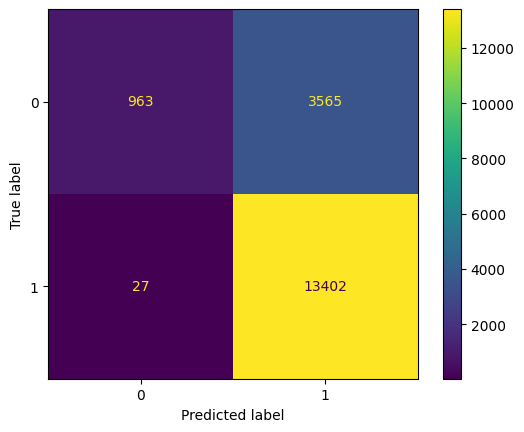

In [13]:
#TO DO: Calculate specificity using confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(specificity)
#TO DO: Visualize confusion matrix using ConfusionMatrixDisplay
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [15]:
#TO DO: Calculate ROC score
roc_score = metrics.roc_auc_score(y_test, y_pred_proba)
print(roc_score)

0.7541904228941795


AUROC:  0.7541904228941795


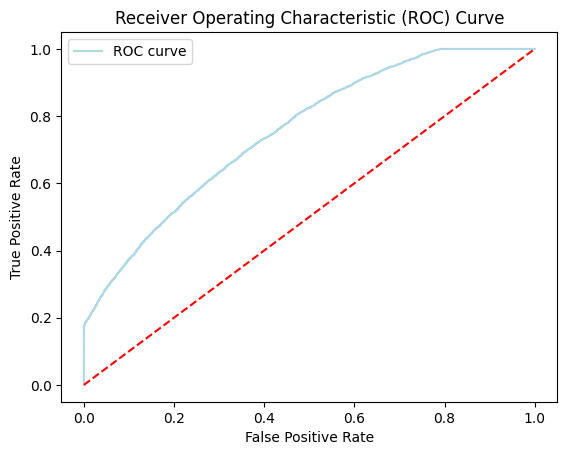

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

# TO DO: Calculate AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print("AUROC: ", auroc)

# TO DO: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color = 'lightblue', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
